# Folium map to display May 2019 weekend data

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from shapely.geometry import Point
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

### Import promise zones for analysis

In [2]:
promise_zones = gpd.read_file('../data/MDHA_Promise_Zones/Export_Output_5.shp')
promise_zones.to_file('../data/MDHA_Promise_Zones/promise_zones.geojson', driver='GeoJSON')

### Analyzing new geojson file

In [3]:
promise_zones.head()

,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe,geometry
0,1,1,1.053728e+08,49364.601403,"POLYGON ((1743366.812 678044.543, 1743367.698 ..."
1,2,2,7.670585e+07,45226.018917,"POLYGON ((1738690.545 661791.347, 1738733.644 ..."
2,3,3,2.985488e+08,75207.067487,"POLYGON ((1759602.544 668309.889, 1759640.155 ..."
3,4,4,2.713638e+08,74348.596054,"POLYGON ((1747799.003 654974.612, 1747821.293 ..."
4,5,5,3.928178e+08,106661.712102,"POLYGON ((1737013.744 692634.639, 1737122.605 ..."


In [4]:
promise_zones = gpd.read_file('../data/MDHA_Promise_Zones/promise_zones.geojson')
print(promise_zones.shape)
print(promise_zones.crs)

(6, 5)
epsg:2274


### Convert epsg:2274 to epsg:4326

In [5]:
promise_zones.crs = "epsg:4326"
print(promise_zones.crs)

epsg:4326


### Testing geometry variable

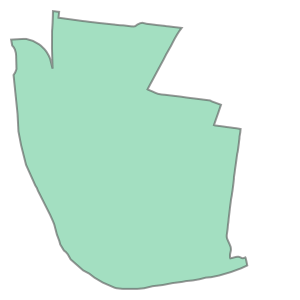

In [6]:
promise_zones.loc[0, 'geometry']

### Read in May 2019 weekends data

In [7]:
may_wknd_df = pd.read_pickle('../data/may_wknd.pkl')
may_wknd_df.head()

,pubdatetime,dff_time,shft_time,shft_elaspe_time,weekday,latitude,longitude,prv_latitude,prv_longitude,nxt_latitude,nxt_longitude,dff_prv_latitude,dff_prv_longitude,dff_nxt_latitude,dff_nxt_longitude,sumdid,chargelevel,companyname
13724123,2019-05-25 00:00:36,0 days 00:05:00,2019-05-25 00:05:36,0 days 00:05:00,5,36.154,-86.785,36.154,-86.785,36.154,-86.785,0.0,0.0,0.000,0.000,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt
13727674,2019-05-25 00:05:36,0 days 00:05:00,2019-05-25 00:10:37,0 days 00:05:01,5,36.154,-86.785,36.154,-86.785,36.154,-86.785,0.0,0.0,0.000,0.000,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt
13731219,2019-05-25 00:10:37,0 days 00:05:01,2019-05-25 00:15:37,0 days 00:05:00,5,36.154,-86.785,36.154,-86.785,36.154,-86.785,0.0,0.0,0.000,0.000,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt
13734513,2019-05-25 00:15:37,0 days 00:05:00,2019-05-25 00:20:37,0 days 00:05:00,5,36.154,-86.785,36.154,-86.785,36.154,-86.785,0.0,0.0,0.000,0.000,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt
13737950,2019-05-25 00:20:37,0 days 00:05:00,2019-05-25 02:10:41,0 days 01:50:04,5,36.154,-86.785,36.154,-86.785,36.128,-86.779,0.0,0.0,0.026,-0.006,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt


### Remove unneeded columns of May 2019 weekends dataframe

In [8]:
may_wknd_df = may_wknd_df[['pubdatetime', 'latitude', 'longitude', 'sumdid', 'chargelevel', 'companyname']]
may_wknd_df.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
13724123,2019-05-25 00:00:36,36.154,-86.785,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt
13727674,2019-05-25 00:05:36,36.154,-86.785,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt
13731219,2019-05-25 00:10:37,36.154,-86.785,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt
13734513,2019-05-25 00:15:37,36.154,-86.785,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt
13737950,2019-05-25 00:20:37,36.154,-86.785,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt


### Create a geometry column for may_wknd_df to be able to create a deodataframe to use with our map

In [9]:
may_wknd_df['geometry'] = may_wknd_df.apply(lambda x: Point((x.longitude, x.latitude)), axis=1)
may_wknd_df.head(3)

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,geometry
13724123,2019-05-25 00:00:36,36.154,-86.785,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt,POINT (-86.785 36.154)
13727674,2019-05-25 00:05:36,36.154,-86.785,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt,POINT (-86.785 36.154)
13731219,2019-05-25 00:10:37,36.154,-86.785,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt,POINT (-86.785 36.154)


### Match may_wknd_df with CRS on the promise_zones 

In [10]:
may_wknd_geo = gpd.GeoDataFrame(may_wknd_df, crs = promise_zones.crs, geometry = may_wknd_df['geometry'])
may_wknd_geo.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,geometry
13724123,2019-05-25 00:00:36,36.154,-86.785,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt,POINT (-86.78500 36.15400)
13727674,2019-05-25 00:05:36,36.154,-86.785,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt,POINT (-86.78500 36.15400)
13731219,2019-05-25 00:10:37,36.154,-86.785,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt,POINT (-86.78500 36.15400)
13734513,2019-05-25 00:15:37,36.154,-86.785,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt,POINT (-86.78500 36.15400)
13737950,2019-05-25 00:20:37,36.154,-86.785,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt,POINT (-86.78500 36.15400)


### Read in points data, create a dataframe of it, add geometry column to it, and create a geodataframe of it.

In [11]:
bus_stops = pd.read_csv('../data/busstops_cleaned.csv')
bus_stops.head()

,stop,route,location,lat,lng
0,GREEN LN & WHITES CREEK PIKE WB,GOLDEN VALLEY,"(36.236249, -86.816722)",36.236249,-86.816722
1,_ 9TH AVE S & EDGEHILL AVE SB,8TH AVENUE SOUTH,"(36.142642, -86.780897)",36.142642,-86.780897
2,DONELSON/DELL STATION OUTBOUND,MURFREESBORO PIKE,"(36.105615, -86.672004)",36.105615,-86.672004
3,17TH AVE S & DOROTHY PL SB,BELMONT,"(36.137623, -86.795609)",36.137623,-86.795609
4,COCKRILL ST & 14TH AVE N,ST. CECILIA - CUMBERLAND,"(36.175944, -86.804242)",36.175944,-86.804242


In [12]:
bike_racks = pd.read_csv('../data/BikeRacks.csv')
bike_racks.head()

,the_geom,Type,OBJECTID,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle
0,POINT (-86.65545277788499 36.049927777764),Rack,1,Public,Existing,113,1,Mall,12,-86.655453,36.049928,Hickory Hollow Mall,Health Dept
1,POINT (-86.63406252260494 36.185280037810095),Rack,2,Public,Existing,114,2,Greenway,4,-86.634063,36.185280,Stones River Greenway - Donelson/Hermitage Area,Health Dept
2,POINT (-86.62067056966654 36.1584215986261),Rack,3,Public,Proposed,256,0,Park/Greenway,0,-86.620671,36.158422,"Percy Priest Reservoir, Stones River Greenway",Health Dept
3,POINT (-86.68652592673462 36.18754669484766),Rack,4,Public,Existing,115,1,Park/Greenway,5,-86.686526,36.187547,"Two Rivers Golf Course, Stones River Greenway ...",Health Dept
4,POINT (-86.76218008308796 36.17245540617397),Rack,5,Public,Existing,103,3,Park/Community Center,15,-86.762180,36.172455,East Park & Community Center,Health Dept


In [13]:
bike_racks['geometry'] = bike_racks['the_geom']
bike_racks.drop('the_geom', axis=1, inplace=True)
bike_racks.head(3)

,Type,OBJECTID,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle,geometry
0,Rack,1,Public,Existing,113,1,Mall,12,-86.655453,36.049928,Hickory Hollow Mall,Health Dept,POINT (-86.65545277788499 36.049927777764)
1,Rack,2,Public,Existing,114,2,Greenway,4,-86.634063,36.185280,Stones River Greenway - Donelson/Hermitage Area,Health Dept,POINT (-86.63406252260494 36.185280037810095)
2,Rack,3,Public,Proposed,256,0,Park/Greenway,0,-86.620671,36.158422,"Percy Priest Reservoir, Stones River Greenway",Health Dept,POINT (-86.62067056966654 36.1584215986261)


In [14]:
bike_racks['geometry'] = bike_racks.apply(lambda x: Point((x.LON, x.LAT)), axis=1)
bike_racks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Type        430 non-null    object 
 1   OBJECTID    430 non-null    int64  
 2   Domain      430 non-null    object 
 3   Status      430 non-null    object 
 4   IDNumber    430 non-null    int64  
 5   Quantity    430 non-null    int64  
 6   Location    430 non-null    object 
 7   Capacity    430 non-null    int64  
 8   LON         426 non-null    float64
 9   LAT         426 non-null    float64
 10  Detail_Loc  430 non-null    object 
 11  Data_Colle  430 non-null    object 
 12  geometry    430 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 43.8+ KB


In [15]:
bus_stops['geometry'] = bus_stops.apply(lambda x: Point((x.lng, x.lat)), axis=1)
bus_stops.head(3)

,stop,route,location,lat,lng,geometry
0,GREEN LN & WHITES CREEK PIKE WB,GOLDEN VALLEY,"(36.236249, -86.816722)",36.236249,-86.816722,POINT (-86.816722 36.236249)
1,_ 9TH AVE S & EDGEHILL AVE SB,8TH AVENUE SOUTH,"(36.142642, -86.780897)",36.142642,-86.780897,POINT (-86.780897 36.142642)
2,DONELSON/DELL STATION OUTBOUND,MURFREESBORO PIKE,"(36.105615, -86.672004)",36.105615,-86.672004,POINT (-86.672004 36.105615)


In [16]:
bus_geo = gpd.GeoDataFrame(bus_stops, crs = promise_zone.crs, geometry = bus_stops['geometry'])
bus_geo.head()

NameError: name 'promise_zone' is not defined